In [139]:
import pandas as pd

data = pd.read_csv('covid_data2.csv',index_col='date',parse_dates=True)
# data2= data[data['location']== 'New Zealand']

In [140]:
data['total_deaths_per_hundred']= data['total_deaths_per_million']*10000

In [141]:
data.head(60)# data=data.sort_values('date')

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,total_deaths_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,AFG,Asia,Afghanistan,40.0,6.0,1.0,1.0,0.998,0.000006,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-24,AFG,Asia,Afghanistan,42.0,2.0,1.0,0.0,1.047,0.000002,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-25,AFG,Asia,Afghanistan,74.0,32.0,1.0,0.0,1.845,0.000032,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-26,AFG,Asia,Afghanistan,80.0,6.0,2.0,1.0,1.995,0.000006,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-27,AFG,Asia,Afghanistan,91.0,11.0,2.0,0.0,2.269,0.000011,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-28,AFG,Asia,Afghanistan,106.0,15.0,2.0,0.0,2.643,0.000015,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-29,AFG,Asia,Afghanistan,114.0,8.0,4.0,2.0,2.843,0.000008,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-30,AFG,Asia,Afghanistan,114.0,0.0,4.0,0.0,2.843,0.000000,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-31,AFG,Asia,Afghanistan,166.0,52.0,4.0,0.0,4.140,0.000052,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04


In [142]:
 df=data[['iso_code','location','total_deaths_per_hundred']]

In [143]:
# df['country']= (df['location'],inplace=True)



df.rename(columns={ 'location' :'country'}, inplace=True)

C:\Users\Yuga 14\AppData\Local\Temp\ipykernel_9592\3292964113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={ 'location' :'country'}, inplace=True)


In [144]:
df

,iso_code,country,total_deaths_per_hundred
date,,,
2020-03-23,AFG,Afghanistan,0.01
2020-03-24,AFG,Afghanistan,0.01
2020-03-25,AFG,Afghanistan,0.01
2020-03-26,AFG,Afghanistan,0.02
2020-03-27,AFG,Afghanistan,0.02
...,...,...,...
2022-10-23,ZWE,Zimbabwe,56.06
2022-10-24,ZWE,Zimbabwe,56.06
2022-10-25,ZWE,Zimbabwe,56.06


In [145]:
#Create new columns based on distinct values and count them
df = df.sort_values('country')
df['cid'] = (df.groupby(['country']).cumcount()==0).astype(int)
 
df['cid'] = df['cid'].cumsum()

In [146]:
tdf=df.loc[df['cid'] == 199]
stdf = tdf.sort_values('total_deaths_per_hundred')
stdf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-03-18,TUR,Turkey,0.01,199
2020-03-17,TUR,Turkey,0.01,199
2020-03-19,TUR,Turkey,0.03,199
2020-03-20,TUR,Turkey,0.04,199
2020-03-21,TUR,Turkey,0.09,199
...,...,...,...,...
2022-10-23,TUR,Turkey,1012.03,199
2022-10-24,TUR,Turkey,1012.03,199
2022-10-26,TUR,Turkey,1012.03,199


In [147]:
val = stdf['total_deaths_per_hundred'].values

In [148]:
val

array([1.00000e-02, 1.00000e-02, 3.00000e-02, 4.00000e-02, 9.00000e-02,
       3.00000e-01, 3.70000e-01, 4.40000e-01, 5.90000e-01, 7.50000e-01,
       9.20000e-01, 1.08000e+00, 1.31000e+00, 1.68000e+00, 2.14000e+00,
       2.77000e+00, 3.56000e+00, 4.25000e+00, 5.01000e+00, 5.74000e+00,
       6.49000e+00, 7.25000e+00, 8.12000e+00, 9.08000e+00, 1.00600e+01,
       1.10100e+01, 1.19800e+01, 1.29600e+01, 1.40300e+01, 1.51800e+01,
       1.64300e+01, 1.76900e+01, 1.89000e+01, 2.01700e+01, 2.14000e+01,
       2.25900e+01, 2.37600e+01, 2.49100e+01, 2.60000e+01, 2.70600e+01,
       2.80500e+01, 2.90000e+01, 2.99200e+01, 3.08100e+01, 3.17400e+01,
       3.25800e+01, 3.33600e+01, 3.39700e+01, 3.46100e+01, 3.52000e+01,
       3.58400e+01, 3.64100e+01, 3.68900e+01, 3.73900e+01, 3.78600e+01,
       3.84100e+01, 3.89400e+01, 3.95200e+01, 4.00700e+01, 4.05500e+01,
       4.09600e+01, 4.14000e+01, 4.17100e+01, 4.19900e+01, 4.22200e+01,
       4.24900e+01, 4.27600e+01, 4.30800e+01, 4.34000e+01, 4.369

In [149]:
train, test = val[:-60],  val[-60:]

In [150]:
test

array([1004.  , 1004.  , 1004.  , 1004.  , 1006.31, 1006.31, 1008.4 ,
       1008.4 , 1008.4 , 1008.4 , 1008.4 , 1008.4 , 1008.4 , 1009.79,
       1010.68, 1010.68, 1010.68, 1010.68, 1010.68, 1010.68, 1010.68,
       1010.68, 1010.68, 1010.68, 1010.68, 1010.68, 1011.39, 1011.39,
       1011.39, 1011.39, 1011.39, 1011.39, 1011.39, 1011.39, 1011.39,
       1011.39, 1011.39, 1011.39, 1011.39, 1011.39, 1011.39, 1011.79,
       1012.03, 1012.03, 1012.03, 1012.03, 1012.03, 1012.03, 1012.03,
       1012.03, 1012.03, 1012.03, 1012.03, 1012.03, 1012.03, 1012.03,
       1012.03, 1012.03, 1012.03, 1012.03])

In [151]:
test.shape

(60,)

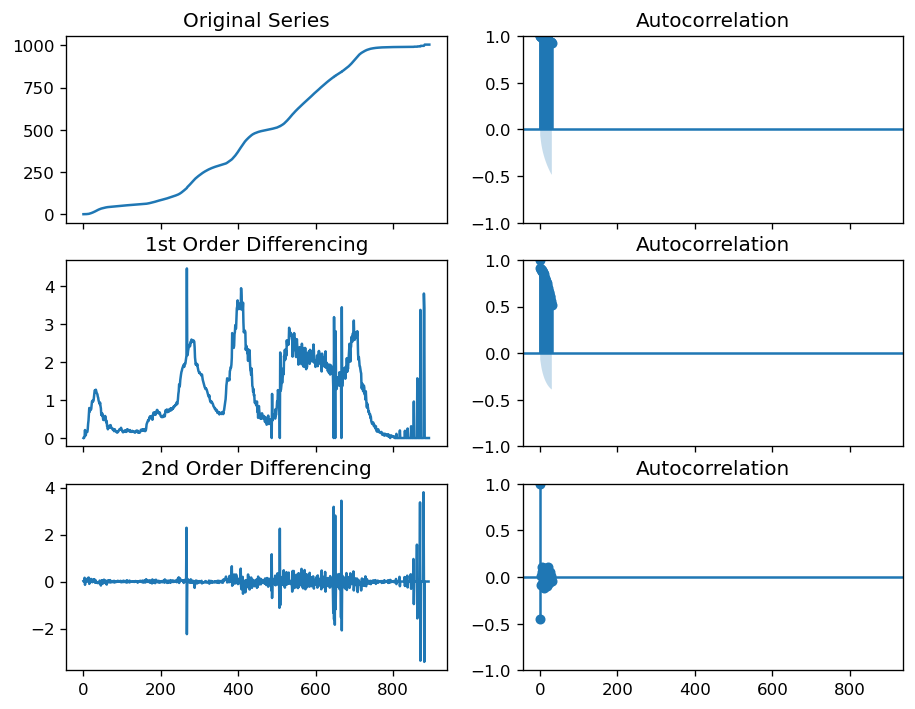

In [152]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train); axes[0, 0].set_title('Original Series')
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(train)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(train), ax=axes[1, 1])
difftrain = np.diff(train)

# 2nd Differencing
axes[2, 0].plot(np.diff(difftrain)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(difftrain), ax=axes[2, 1])
plt.show()

In [153]:
# !pip install pmdarima

In [154]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=528.585, Time=0.66 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=848.812, Time=0.31 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=647.699, Time=0.38 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=526.589, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=846.812, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=528.584, Time=0.42 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=525.186, Time=0.96 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=526.373, Time=1.36 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=526.160, Time=1.74 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=529.737, Time=0.65 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=529.894, Time=1.13 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=527.434, Time=3.56 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=523.186, Time=0.90 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=526.584, Time=0.33 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=526.5

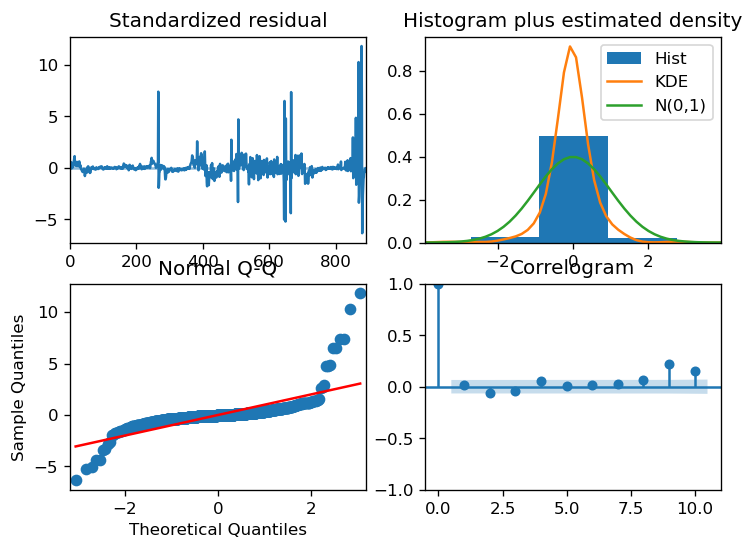

In [155]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

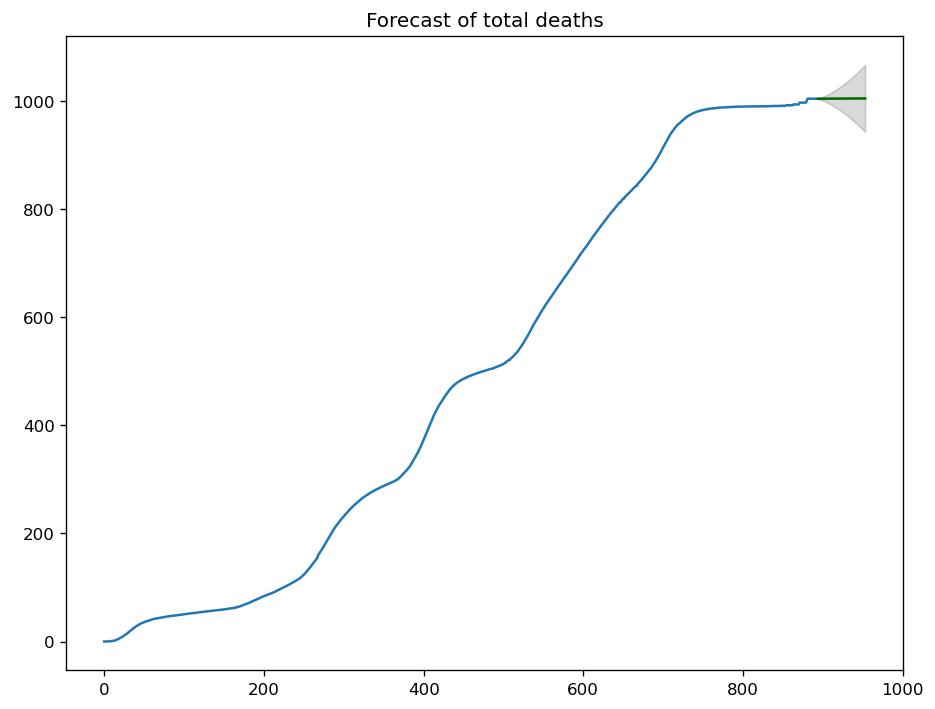

In [156]:
# Forecast
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [157]:
print(fc_series)

894    1003.991120
895    1004.015938
896    1004.008697
897    1004.031956
898    1004.026199
899    1004.048047
900    1004.043631
901    1004.064202
902    1004.061002
903    1004.080417
904    1004.078316
905    1004.096685
906    1004.095580
907    1004.113001
908    1004.112797
909    1004.129362
910    1004.129973
911    1004.145762
912    1004.147111
913    1004.162197
914    1004.164215
915    1004.178666
916    1004.181288
917    1004.195164
918    1004.198333
919    1004.211688
920    1004.215353
921    1004.228236
922    1004.232349
923    1004.244807
924    1004.249325
925    1004.261397
926    1004.266283
927    1004.278004
928    1004.283223
929    1004.294628
930    1004.300148
931    1004.311267
932    1004.317059
933    1004.327919
934    1004.333957
935    1004.344583
936    1004.350844
937    1004.361258
938    1004.367721
939    1004.377942
940    1004.384588
941    1004.394635
942    1004.401447
943    1004.411337
944    1004.418298
945    1004.428046
946    1004.

In [158]:
accuracy=pd.DataFrame({'observed':test, 'predicted':fc_series})

In [159]:
accuracy['diff']= accuracy['predicted']-accuracy['observed'] 

In [160]:
accuracy['country']='Turkey' 

In [161]:
accuracy

,observed,predicted,diff,country
894,1004.00,1003.991120,-0.008880,Turkey
895,1004.00,1004.015938,0.015938,Turkey
896,1004.00,1004.008697,0.008697,Turkey
897,1004.00,1004.031956,0.031956,Turkey
898,1006.31,1004.026199,-2.283801,Turkey
899,1006.31,1004.048047,-2.261953,Turkey
900,1008.40,1004.043631,-4.356369,Turkey
901,1008.40,1004.064202,-4.335798,Turkey
902,1008.40,1004.061002,-4.338998,Turkey
903,1008.40,1004.080417,-4.319583,Turkey


In [162]:
gdf=df.loc[df['cid'] == 75]
sgdf = gdf.sort_values('total_deaths_per_hundred')
sgdf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-03-10,DEU,Germany,0.02,75
2020-03-09,DEU,Germany,0.02,75
2020-03-11,DEU,Germany,0.03,75
2020-03-13,DEU,Germany,0.05,75
2020-03-12,DEU,Germany,0.05,75
...,...,...,...,...
2022-10-23,DEU,Germany,1524.82,75
2022-10-24,DEU,Germany,1527.55,75
2022-10-25,DEU,Germany,1529.97,75


In [163]:
val1 = sgdf['total_deaths_per_hundred'].values

In [164]:
train1, test1 = val1[:-60],  val1[-60:]

In [165]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model1 = pm.auto_arima(train1, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3472.807, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14742.720, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3155.086, Time=0.69 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3488.815, Time=0.79 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3064.968, Time=0.79 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3066.296, Time=1.72 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 9.119 seconds
                               SARIMAX Results                                
Dep. Variable:                      y 

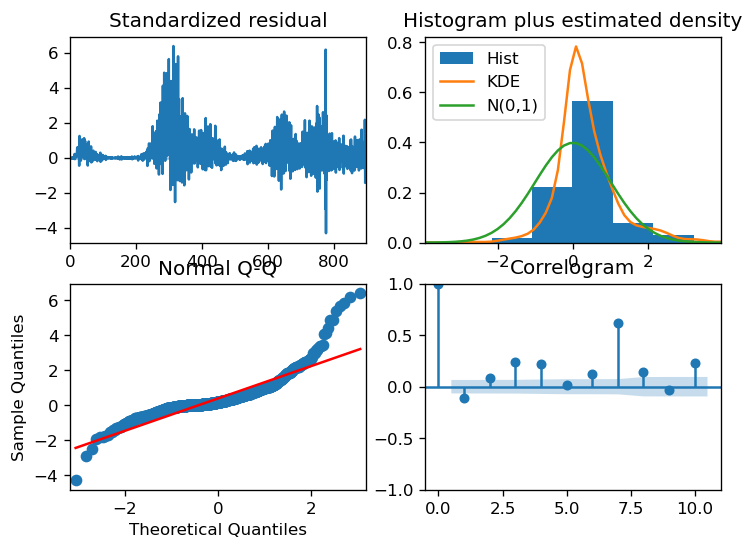

In [166]:
model1.plot_diagnostics(figsize=(7,5))
plt.show()

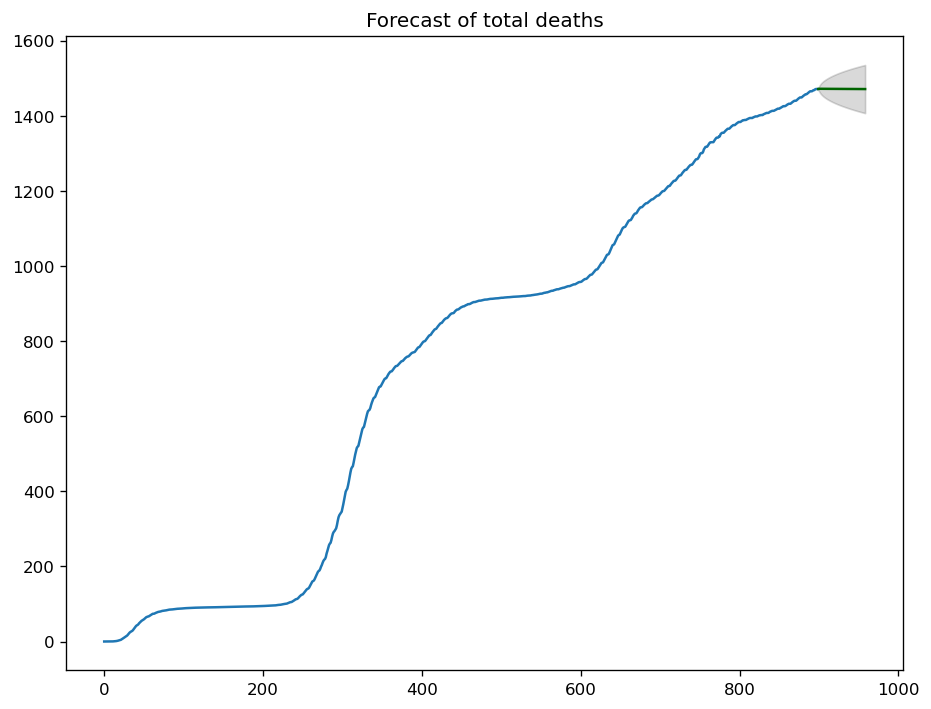

In [167]:
# Forecast
n_periods = 60
fc, confint = model1.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train1), len(train1)+n_periods)

# make series for plotting purpose
fc_series1 = pd.Series(fc, index=index_of_fc)
lower_series1 = pd.Series(confint[:, 0], index=index_of_fc)
upper_series1 = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train1)
plt.plot(fc_series1, color='darkgreen')
plt.fill_between(lower_series1.index,
lower_series1,
upper_series1,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [168]:
print(fc_series1)

899    1471.192057
900    1471.537175
901    1471.623719
902    1471.611180
903    1471.598640
904    1471.586101
905    1471.573561
906    1471.561022
907    1471.548483
908    1471.535944
909    1471.523405
910    1471.510867
911    1471.498328
912    1471.485789
913    1471.473251
914    1471.460713
915    1471.448174
916    1471.435636
917    1471.423098
918    1471.410560
919    1471.398022
920    1471.385485
921    1471.372947
922    1471.360410
923    1471.347872
924    1471.335335
925    1471.322798
926    1471.310261
927    1471.297724
928    1471.285187
929    1471.272650
930    1471.260114
931    1471.247577
932    1471.235041
933    1471.222504
934    1471.209968
935    1471.197432
936    1471.184896
937    1471.172360
938    1471.159825
939    1471.147289
940    1471.134753
941    1471.122218
942    1471.109683
943    1471.097147
944    1471.084612
945    1471.072077
946    1471.059542
947    1471.047007
948    1471.034473
949    1471.021938
950    1471.009404
951    1470.

In [169]:
accuracy2=pd.DataFrame({'observed':test1, 'predicted':fc_series1})

In [170]:
accuracy2['diff']= accuracy2['predicted']-accuracy2['observed'] 

In [171]:
accuracy2['country']='Germany'

In [173]:
accuracy2

,observed,predicted,diff,country
899,1472.23,1471.192057,-1.037943,Germany
900,1472.23,1471.537175,-0.692825,Germany
901,1474.94,1471.623719,-3.316281,Germany
902,1476.42,1471.611180,-4.808820,Germany
903,1477.62,1471.598640,-6.021360,Germany
904,1477.62,1471.586101,-6.033899,Germany
905,1477.62,1471.573561,-6.046439,Germany
906,1478.61,1471.561022,-7.048978,Germany
907,1479.81,1471.548483,-8.261517,Germany
908,1480.98,1471.535944,-9.444056,Germany


In [174]:
de_tu= pd.concat([accuracy2,accuracy],ignore_index=True)

In [175]:
de_tu

,observed,predicted,diff,country
0,1472.23,1471.192057,-1.037943,Germany
1,1472.23,1471.537175,-0.692825,Germany
2,1474.94,1471.623719,-3.316281,Germany
3,1476.42,1471.611180,-4.808820,Germany
4,1477.62,1471.598640,-6.021360,Germany
...,...,...,...,...
115,1012.03,1004.461482,-7.568518,Turkey
116,1012.03,1004.468813,-7.561187,Turkey
117,1012.03,1004.478209,-7.551791,Turkey
118,1012.03,1004.485640,-7.544360,Turkey


In [176]:
de_tu.to_csv("C:/Users/Yuga 14/Desktop/final project/crona/covid_de_tu.csv", index=False)